In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("HeartFailure.csv")
df.head()

,ID,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df_cluster = df.iloc[:,1:13]
df_cluster.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
df_cluster.shape

In [4]:
# Scaling the Data
def datapreprocessing(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_normalized = normalize(df_scaled)
    df_normalized = pd.DataFrame(df_normalized)
    pca = PCA(n_components = 2)
    df_principal = pca.fit_transform(df_normalized)
    df_principal = pd.DataFrame(df_principal)
    df_principal.columns = ['P1', 'P2']
    return df_principal

In [5]:
df_cluster1 = datapreprocessing(df_cluster)

In [6]:
df_cluster1.shape

(299, 2)

In [7]:
# Building the affinity model
def spectral(n,a,df):
    spectral_model_rbf = SpectralClustering(n_clusters = n, affinity = a)
    labels_rbf = spectral_model_rbf.fit_predict(df)
    return labels_rbf

In [12]:
labels_rbf = spectral(2,"nearest_neighbors",df_cluster1)

In [13]:
# Building the label to colour mapping
def visualization(df1,df2):
    colours = {}
    colours[0] = 'b'
    colours[1] = 'y'
  
    cvec = [colours[label] for label in df1]
    b = plt.scatter(df2['P1'], df2['P2'], color ='b');
    y = plt.scatter(df2['P1'], df2['P2'], color ='y');
  
    plt.figure(figsize =(9, 9))
    plt.scatter(df2['P1'], df2['P2'], c = cvec)
    plt.legend((b, y), ('Label 0', 'Label 1'))
    plot = plt.show()
    return plot

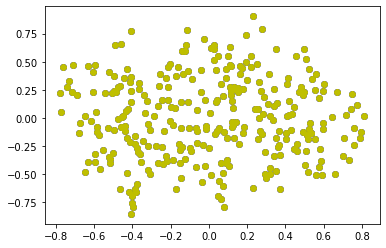

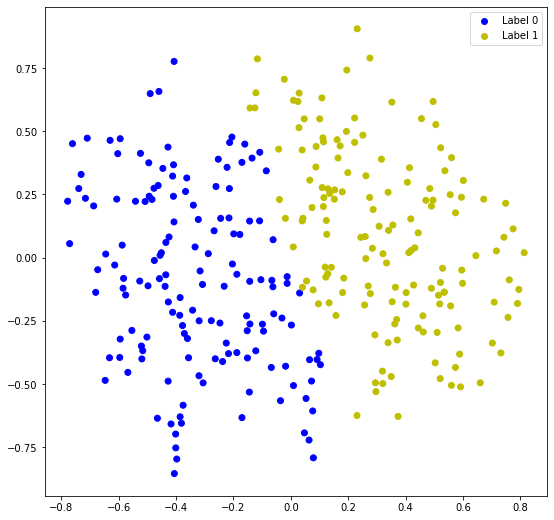

In [14]:
visualization(labels_rbf,df_cluster1)